In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


## 1.Load and Explore

In [2]:
data = pd.read_csv("F:/house_prices_with_missing.csv")

In [3]:
data.head()

,Size,Location,Number of Rooms,Price
0,3793.52,rural,10.0,676065.32
1,1225.25,urban,4.0,410230.33
2,2686.32,rural,7.0,506981.39
3,2972.24,rural,7.0,543498.51
4,1303.22,urban,3.0,390291.16


In [4]:
data.tail()

,Size,Location,Number of Rooms,Price
495,1404.17,suburban,4.0,276568.81
496,1858.88,suburban,4.0,435714.53
497,1133.24,urban,2.0,361632.88
498,2129.77,suburban,5.0,482203.06
499,2137.69,rural,5.0,377040.63


In [6]:
data.shape

(500, 4)

In [7]:
data.dtypes

Size               float64
Location            object
Number of Rooms    float64
Price              float64
dtype: object

In [8]:
data.isnull().sum()

Size               4
Location           3
Number of Rooms    2
Price              6
dtype: int64

In [15]:
data.describe()

,Size,Number of Rooms,Price
count,496.000000,498.000000,494.000000
mean,1744.119940,3.923695,394121.653036
std,607.538407,1.572590,100307.965990
min,500.000000,2.000000,131068.180000
25%,1260.105000,3.000000,324631.447500
50%,1674.585000,4.000000,393418.820000
75%,2217.347500,5.000000,464748.690000
max,3793.520000,10.000000,676065.320000


In [27]:
data['Size'].fillna(data['Size'].mean(), inplace=True)

In [29]:
data['Number of Rooms'].fillna(data['Number of Rooms'].mean(), inplace=True)

In [31]:
data['Location'].fillna(data['Location'].mode()[0], inplace=True)

In [35]:
data['Price'].fillna(data['Price'].mean(), inplace=True)

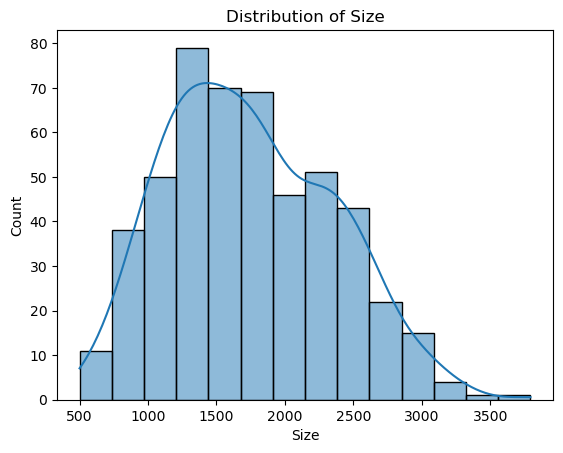

In [39]:
sns.histplot(data['Size'], kde=True)
plt.title("Distribution of Size")
plt.show()

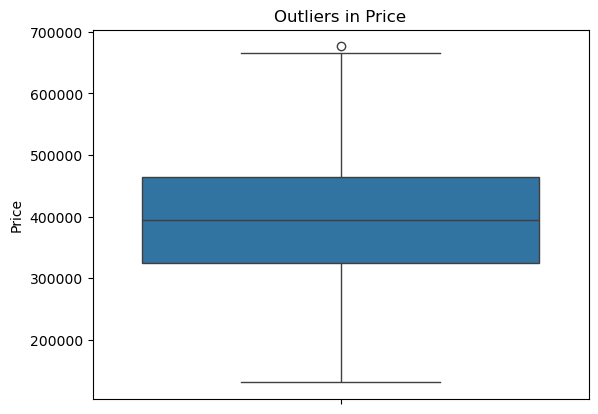

In [43]:
sns.boxplot(y=data['Price'])
plt.title("Outliers in Price")
plt.show()

## 2. Data Preprocessing

In [46]:
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [48]:
X = data[['Size', 'Location', 'Number of Rooms']]
y = data['Price']

In [50]:
numeric_features = ['Size', 'Number of Rooms']
categorical_features = ['Location']

In [52]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', MinMaxScaler(), numeric_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])

## 3. Feature Selection


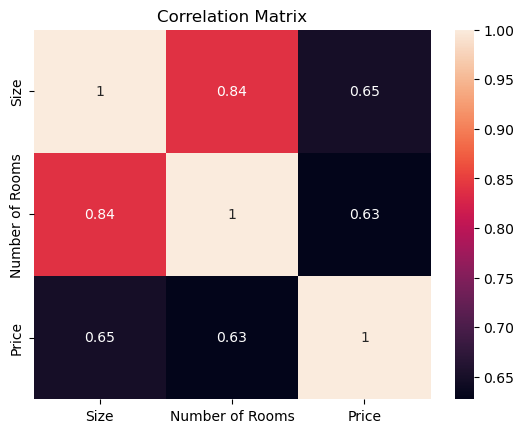

In [55]:
corr_matrix = data.corr(numeric_only=True)
sns.heatmap(corr_matrix, annot=True)
plt.title("Correlation Matrix")
plt.show()

## 4. Model Training


In [58]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [60]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

In [62]:
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

In [64]:
model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', MinMaxScaler(),
                                                  ['Size', 'Number of Rooms']),
                                                 ('cat', OneHotEncoder(),
                                                  ['Location'])])),
                ('regressor', LinearRegression())])

## 5. Model Evaluation


In [67]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np


In [69]:
y_pred = model.predict(X_test)

In [71]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

In [73]:
print(f"RMSE: {rmse}")
print(f"R² Score: {r2}")

RMSE: 30690.20377183044
R² Score: 0.905306604642924
